##Import Libraries

In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Load and check Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv


In [5]:
penl = pd.read_csv("penguins_lter.csv")

In [ ]:
penl.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## EDA

In [ ]:
penl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
penl.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [ ]:
print("No. of Rows: ", penl.shape[0])
print("No. of columns: ", penl.shape[1])
print("\nFeatures: \n", penl.columns.tolist())
print("\nMissing Values: \n", penl.isnull().sum().values.sum())
print("\nUnique Values: \n", penl.nunique())

No. of Rows:  344
No. of columns:  17

Features: 
 ['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments']

Missing Values: 
 363

Unique Values: 
 studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                 7
dtype: int64


In [ ]:
penl.corr()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.236356,-0.022352,0.040849,-0.007042,0.006952,-0.488690
Culmen Length (mm),-0.236356,1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
Culmen Depth (mm),-0.022352,-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
Flipper Length (mm),0.040849,0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
Body Mass (g),-0.007042,0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
Delta 15 N (o/oo),0.006952,-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),-0.488690,0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


No handles with labels found to put in legend.


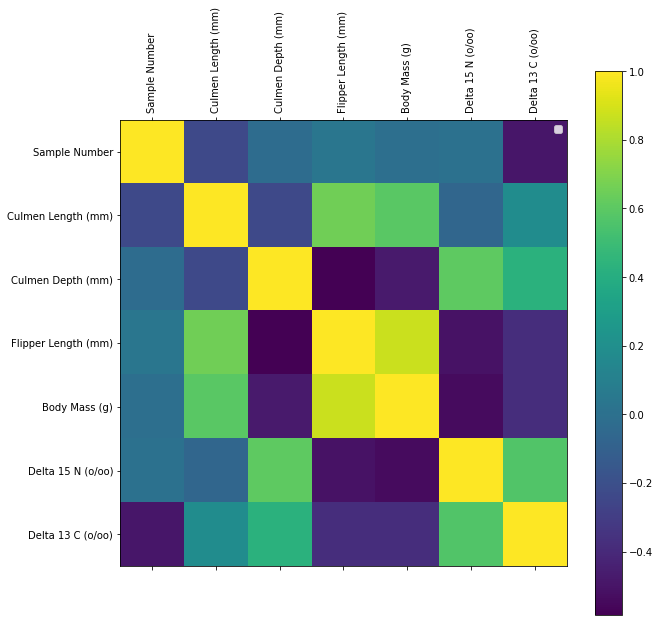

In [ ]:
def plot_corr(penl,size=10):
  corr = penl.corr()
  fig,ax = plt.subplots(figsize = (size,size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation = "vertical")
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(penl)

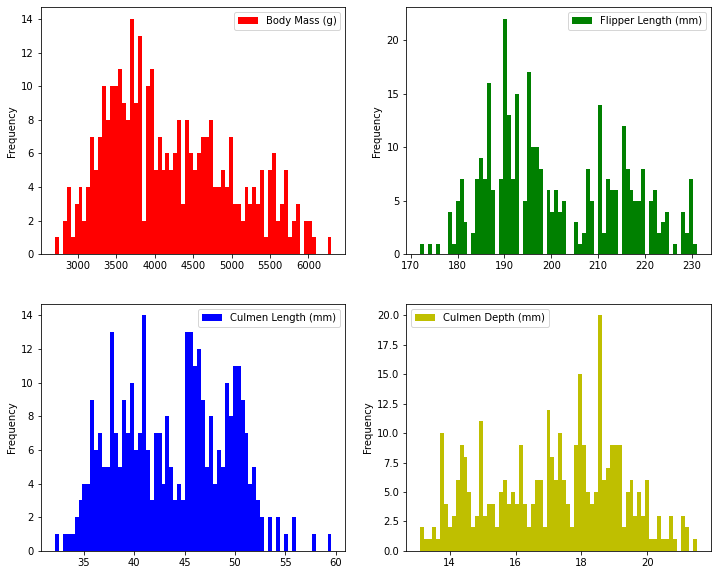

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
penl.plot(kind="hist", y = 'Body Mass (g)', bins = 70, color = "r", ax = axes[0][0])
penl.plot(kind="hist", y = 'Flipper Length (mm)', bins = 70, color = "g", ax = axes[0][1])
penl.plot(kind="hist", y = 'Culmen Length (mm)', bins = 70, color = "b", ax = axes[1][0])
penl.plot(kind="hist", y = 'Culmen Depth (mm)', bins = 70, color = "y", ax = axes[1][1])
plt.show()

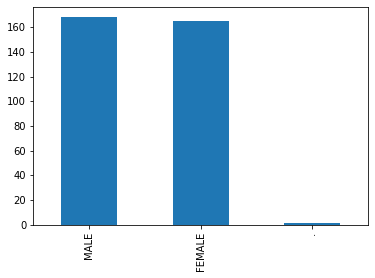

In [15]:
penl["Sex"].value_counts().plot(kind="bar")

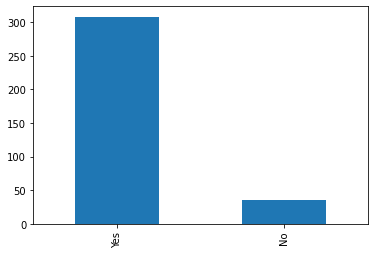

In [17]:
penl["Clutch Completion"].value_counts().plot(kind="bar")

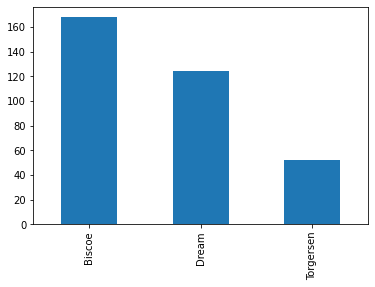

In [18]:
penl["Island"].value_counts().plot(kind="bar")

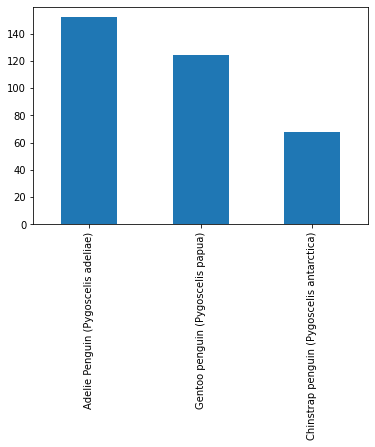

In [19]:
penl["Species"].value_counts().plot(kind="bar")

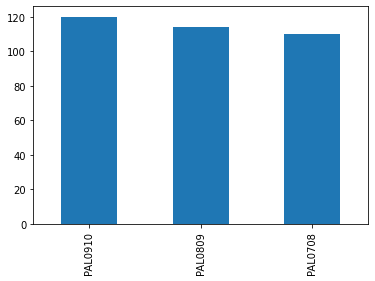

In [20]:
penl["studyName"].value_counts().plot(kind="bar")

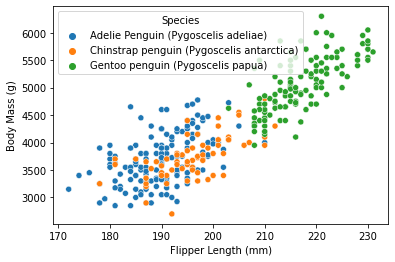

In [6]:
sns.scatterplot(x="Flipper Length (mm)", y="Body Mass (g)", data=penl, hue="Species")

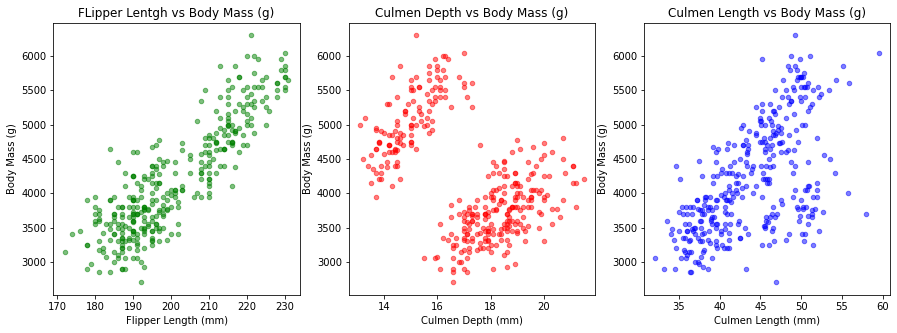

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
penl.plot(kind="scatter", x="Flipper Length (mm)", y="Body Mass (g)", alpha=0.5, color="green", ax = axes[0], title= "FLipper Lentgh vs Body Mass (g)")
penl.plot(kind="scatter", x="Culmen Depth (mm)", y="Body Mass (g)", alpha=0.5, color="red", ax = axes[1], title= "Culmen Depth vs Body Mass (g)")
penl.plot(kind="scatter", x="Culmen Length (mm)", y="Body Mass (g)", alpha=0.5, color="blue", ax = axes[2], title= "Culmen Length vs Body Mass (g)")
plt.show()

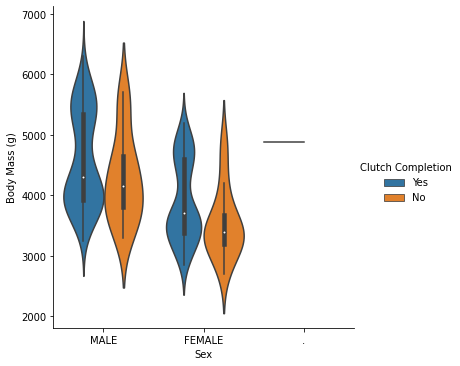

In [38]:
sns.catplot(x = "Sex", y = "Body Mass (g)", hue = "Clutch Completion",
            kind = "violin", data = penl)

Text(0.5, 1.0, 'Clutch Completion')

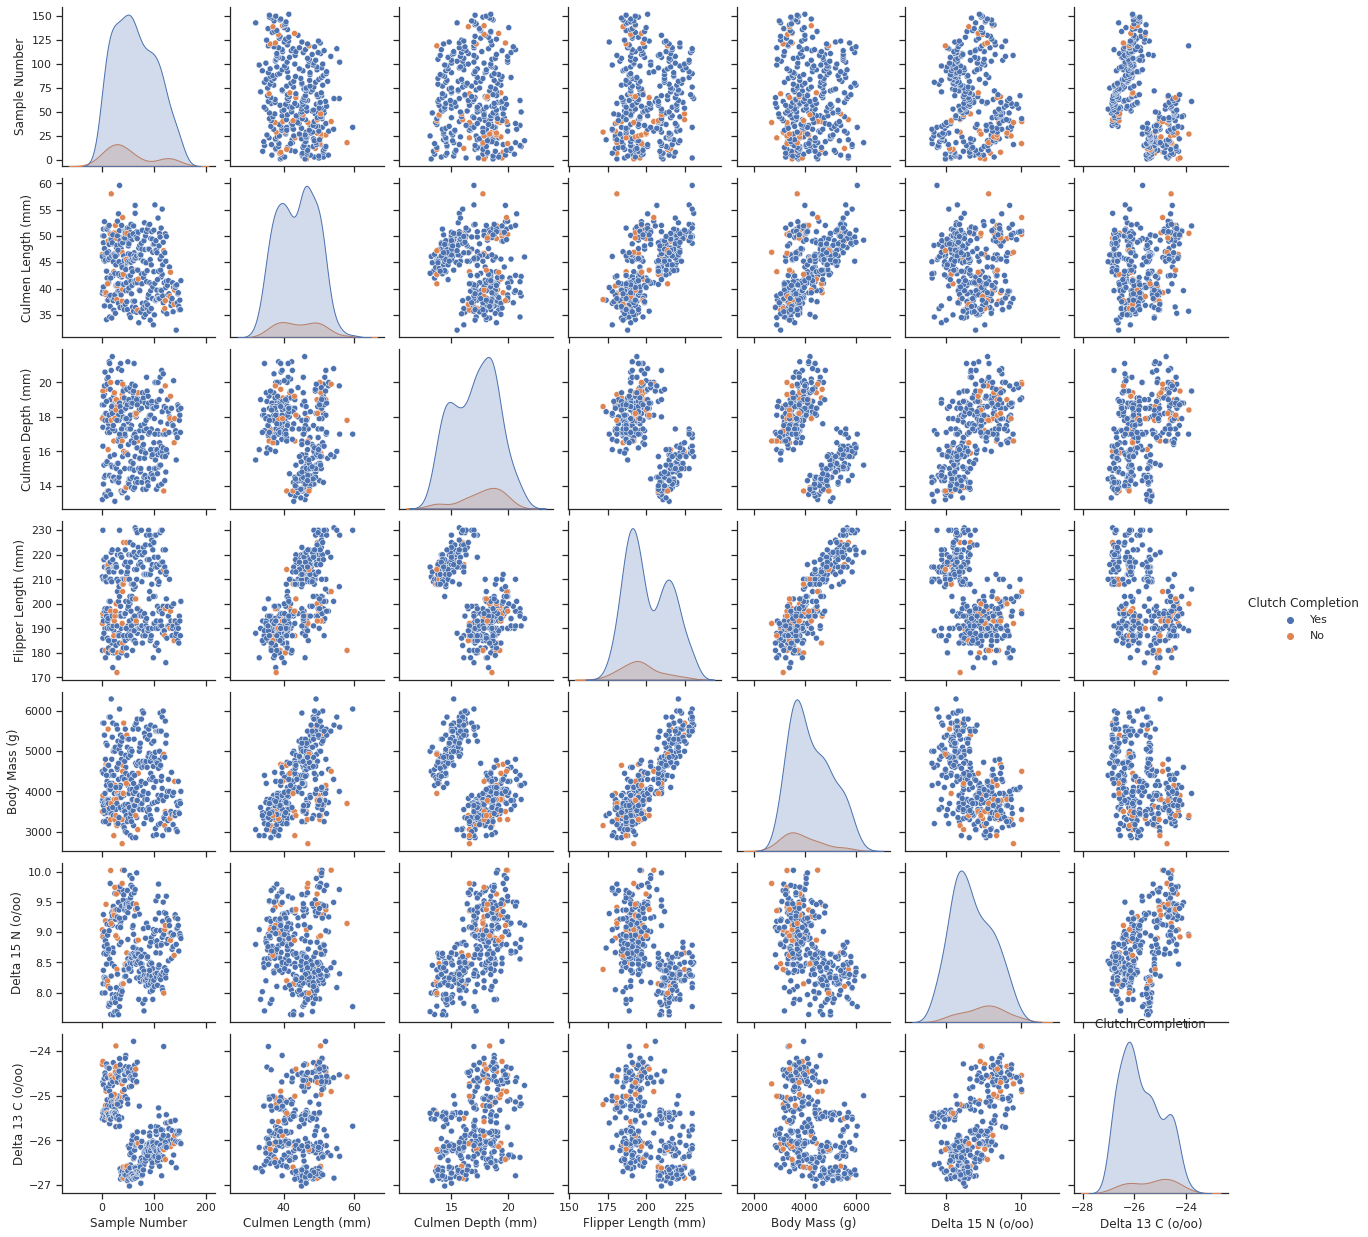

In [39]:
sns.set(style = "ticks")
sns.pairplot(penl, hue = "Clutch Completion")
plt.title("Clutch Completion")

## Feature Engineering

#Detecting Missing Datasets

In [48]:
penl = penl.replace(" ",np.nan)
penl.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


##Detecting and Treating Missing Values

In [72]:
print(penl.isnull().sum())

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


In [73]:
penl = penl.dropna()
penl.count()

studyName              13
Sample Number          13
Species                13
Region                 13
Island                 13
Stage                  13
Individual ID          13
Clutch Completion      13
Date Egg               13
Culmen Length (mm)     13
Culmen Depth (mm)      13
Flipper Length (mm)    13
Body Mass (g)          13
Sex                    13
Delta 15 N (o/oo)      13
Delta 13 C (o/oo)      13
Comments               13
dtype: int64

In [74]:
print(penl.isnull().sum())

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64


In [70]:
penl["Culmen Length (mm)"].replace(np.NaN , penl["Culmen Length (mm)"].mean()).head(343)
penl["Culmen Depth (mm)"].replace(np.NaN , penl["Culmen Depth (mm)"].mean()).head(343)

0      18.70000
1      17.40000
2      18.00000
3      17.15117
4      19.30000
         ...   
338    13.70000
339    17.15117
340    14.30000
341    15.70000
342    14.80000
Name: Culmen Depth (mm), Length: 343, dtype: float64

##Detecting and Treating Duplicates

In [75]:
penl.shape

(13, 17)

In [76]:
duplicate_rows_penl = penl[penl.duplicated()]
print("number of duplicate rows: ", duplicate_rows_penl.shape)

number of duplicate rows:  (0, 17)


In [77]:
penl.count()

studyName              13
Sample Number          13
Species                13
Region                 13
Island                 13
Stage                  13
Individual ID          13
Clutch Completion      13
Date Egg               13
Culmen Length (mm)     13
Culmen Depth (mm)      13
Flipper Length (mm)    13
Body Mass (g)          13
Sex                    13
Delta 15 N (o/oo)      13
Delta 13 C (o/oo)      13
Comments               13
dtype: int64

In [78]:
penl = penl.drop_duplicates()
penl.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
28,PAL0708,29,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A1,No,11/10/07,37.9,18.6,172.0,3150.0,FEMALE,8.38404,-25.19837,Nest never observed with full clutch.
29,PAL0708,30,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A2,No,11/10/07,40.5,18.9,180.0,3950.0,MALE,8.90027,-25.11609,Nest never observed with full clutch.
38,PAL0708,39,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N25A1,No,11/13/07,37.6,19.3,181.0,3300.0,FEMALE,9.41131,-25.04169,Nest never observed with full clutch.


In [79]:
penl.count()

studyName              13
Sample Number          13
Species                13
Region                 13
Island                 13
Stage                  13
Individual ID          13
Clutch Completion      13
Date Egg               13
Culmen Length (mm)     13
Culmen Depth (mm)      13
Flipper Length (mm)    13
Body Mass (g)          13
Sex                    13
Delta 15 N (o/oo)      13
Delta 13 C (o/oo)      13
Comments               13
dtype: int64

##Detecting and treating Categorical Variables

In [98]:
Body_Mass = penl["Body Mass (g)"] 

In [99]:
bins = [2700, 3450, 4202, 5250, 6300]

In [100]:
cats = pd.cut(Body_Mass, bins)

In [101]:
cats

6      (3450, 4202]
7      (4202, 5250]
28     (2700, 3450]
29     (3450, 4202]
38     (2700, 3450]
68     (2700, 3450]
69     (4202, 5250]
120    (2700, 3450]
121    (3450, 4202]
130    (2700, 3450]
131    (3450, 4202]
138    (2700, 3450]
139    (4202, 5250]
Name: Body Mass (g), dtype: category
Categories (4, interval[int64]): [(2700, 3450] < (3450, 4202] < (4202, 5250] < (5250, 6300]]

In [106]:
cats.value_counts()

(2700, 3450]    6
(3450, 4202]    4
(4202, 5250]    3
(5250, 6300]    0
Name: Body Mass (g), dtype: int64

In [108]:
group_names = ["Much ligher", "lighter than averge", "heavier than average", "Much heavier" ]

In [110]:
cats2 = pd.cut(Body_Mass, bins, labels= group_names)

In [111]:
cats2.value_counts()

Much ligher             6
lighter than averge     4
heavier than average    3
Much heavier            0
Name: Body Mass (g), dtype: int64

##Detect and treat Skewed Distributions

In [86]:
penl.skew()

Sample Number         -0.154924
Culmen Length (mm)     0.689209
Culmen Depth (mm)     -0.430576
Flipper Length (mm)   -0.489467
Body Mass (g)          0.915613
Delta 15 N (o/oo)     -0.301831
Delta 13 C (o/oo)      0.233805
dtype: float64